In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle
import matplotlib
from matplotlib import animation as animation
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

<h1> Microfinance in Indian Villages </h1>
<br>
For each village, there are 12 adj matrices, each measuring a specific attribute of the villagers

Village 1
* "../data/network/AdjMatrix/adj_borrowmoney_vilno_1.csv"
* "../data/network/AdjMatrix/adj_giveadvice_vilno_1.csv"
* "../data/network/AdjMatrix/adj_helpdecision_vilno_1.csv"
* "../data/network/AdjMatrix/adj_keroricecome_vilno_1.csv"
* "../data/network/AdjMatrix/adj_keroricego_vilno_1.csv"
* "../data/network/AdjMatrix/adj_lendmoney_vilno_1.csv"
* "../data/network/AdjMatrix/adj_medic_vilno_1.csv"
* "../data/network/AdjMatrix/adj_nonrel_vilno_1.csv"
* "../data/network/AdjMatrix/adj_rel_vilno_1.csv"
* "../data/network/AdjMatrix/adj_templecompany_vilno_1.csv"
* "../data/network/AdjMatrix/adj_visitcome_vilno_1.csv"
* "../data/network/AdjMatrix/adj_visitgo_vilno_1.csv"

Village 1 Key - Identifies Villagers by id 

In [2]:
key = pd.read_csv("../data/network/AdjMatrixKeys/key_vilno_1.csv", header = None)
key = list(key[0])
key[0:10]

[100101,
 100102,
 100103,
 100104,
 100201,
 100202,
 100203,
 100204,
 100205,
 100206]

<h3> Data Set 1: Borrow Money </h3>

In [3]:
BM = pd.read_csv("../data/network/AdjMatrix/adj_borrowmoney_vilno_1.csv", header = None)
BM_graph = nx.Graph(BM.values)

In [4]:
# Create a Map from Default Node IDs to Actual Node IDS from AdjMatrixKeys
map_id = {}
for i in BM_graph.nodes():
    map_id[i] = key[i]

map_id

{0: 100101,
 1: 100102,
 2: 100103,
 3: 100104,
 4: 100201,
 5: 100202,
 6: 100203,
 7: 100204,
 8: 100205,
 9: 100206,
 10: 100301,
 11: 100302,
 12: 100303,
 13: 100304,
 14: 100401,
 15: 100402,
 16: 100403,
 17: 100404,
 18: 100501,
 19: 100502,
 20: 100503,
 21: 100504,
 22: 100601,
 23: 100602,
 24: 100603,
 25: 100604,
 26: 100701,
 27: 100702,
 28: 100703,
 29: 100704,
 30: 100705,
 31: 100706,
 32: 100801,
 33: 100802,
 34: 100803,
 35: 100804,
 36: 100805,
 37: 100806,
 38: 100807,
 39: 100808,
 40: 100901,
 41: 100902,
 42: 100903,
 43: 100904,
 44: 100905,
 45: 100906,
 46: 100907,
 47: 101001,
 48: 101201,
 49: 101202,
 50: 101203,
 51: 101204,
 52: 101205,
 53: 101206,
 54: 101207,
 55: 101208,
 56: 101301,
 57: 101302,
 58: 101303,
 59: 101401,
 60: 101402,
 61: 101403,
 62: 101404,
 63: 101405,
 64: 101501,
 65: 101502,
 66: 101503,
 67: 101504,
 68: 101505,
 69: 101506,
 70: 101601,
 71: 101602,
 72: 101603,
 73: 101604,
 74: 101605,
 75: 101701,
 76: 101801,
 77: 1018

In [5]:
BM_graph = nx.relabel_nodes(BM_graph, map_id) # use relabel_nodes method to change default node ids
list(BM_graph.nodes())[0:10]

[100101,
 100102,
 100103,
 100104,
 100201,
 100202,
 100203,
 100204,
 100205,
 100206]

In [6]:
print(list(BM_graph.edges())[0:10])
print(len(BM_graph.edges()))

[(100101, 100102), (100101, 100103), (100101, 100104), (100102, 100103), (100102, 100104), (100103, 100104), (100103, 104202), (100201, 100202), (100201, 100203), (100201, 100204)]
2149


In [7]:
BM_file = open("../pickles/v1_BM.pickle", "wb")
pickle.dump(BM_graph, BM_file)

<h3> Function other networks into nx graphs </h3>

In [8]:
def file_to_nx(file, key_map):
    df = pd.read_csv(file, header = None)
    g = nx.Graph(df.values)
    g = nx.relabel_nodes(g, key_map)
    return g

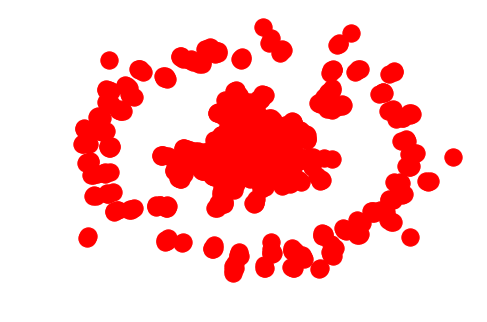

In [9]:
# Give Advice Data
GA_graph = file_to_nx("../data/network/AdjMatrix/adj_giveadvice_vilno_1.csv", map_id)
nx.draw(GA_graph)

In [10]:
len(GA_graph.edges())

2010

In [11]:
GA_file = open("../pickles/v1_GA.pickle", "wb")
pickle.dump(GA_graph, GA_file)

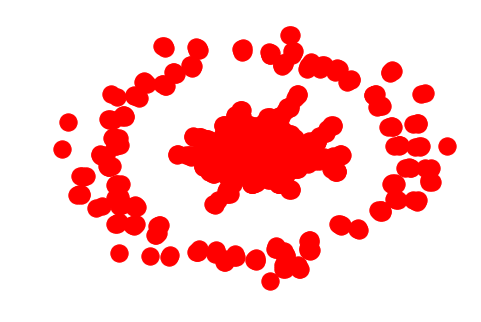

In [12]:
# Help Decision
HD_graph = file_to_nx("../data/network/AdjMatrix/adj_helpdecision_vilno_1.csv", map_id)
nx.draw(HD_graph)

In [13]:
len(HD_graph.edges())

2065

In [159]:
HD_file = open("../pickles/v1_HD.pickle", "wb")
pickle.dump(HD_graph, HD_file)

In [14]:
KORC_graph = file_to_nx("../data/network/AdjMatrix/adj_keroricecome_vilno_1.csv", map_id)
KORG_graph = file_to_nx("../data/network/AdjMatrix/adj_keroricego_vilno_1.csv", map_id)
LM_graph = file_to_nx("../data/network/AdjMatrix/adj_lendmoney_vilno_1.csv", map_id)
M_graph = file_to_nx("../data/network/AdjMatrix/adj_medic_vilno_1.csv", map_id)
ESW_graph = file_to_nx("../data/network/AdjMatrix/adj_nonrel_vilno_1.csv", map_id)
R_graph = file_to_nx("../data/network/AdjMatrix/adj_rel_vilno_1.csv", map_id)
TC_graph = file_to_nx("../data/network/AdjMatrix/adj_templecompany_vilno_1.csv", map_id)
IOH_graph = file_to_nx("../data/network/AdjMatrix/adj_visitcome_vilno_1.csv", map_id)
VAH_graph = file_to_nx("../data/network/AdjMatrix/adj_visitgo_vilno_1.csv", map_id)

In [15]:
pickle.dump(KORC_graph, open("../pickles/v1_KORC.pickle", "wb"))
pickle.dump(KORG_graph, open("../pickles/v1_KORG.pickle", "wb"))
pickle.dump(LM_graph, open("../pickles/v1_LM.pickle", "wb"))
pickle.dump(M_graph, open("../pickles/v1_M.pickle", "wb"))
pickle.dump(ESW_graph, open("../pickles/v1_ESW.pickle", "wb"))
pickle.dump(R_graph, open("../pickles/v1_R.pickle", "wb"))
pickle.dump(TC_graph, open("../pickles/v1_KORG.pickle", "wb"))

<h2> Reading in Stata Data on Individual Characteristics </h2>

In [178]:
ind_data = pd.read_stata("../data/demographics/individual_characteristics.dta")

In [172]:
ind_data.shape

(16984, 48)

In [169]:
v1_people = ind_data[ind_data["village"] == 1]
v1_people.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1,Yes,1.0,Yes,No,
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


In [175]:
v1_people[v1_people["village"] == 1].shape

(203, 48)

In [177]:
len(BM_graph.node)

843

In [179]:
village_data = pd.read_stata("../data/demographics/household_characteristics.dta")

In [180]:
village_data.head()

,village,adjmatrix_key,HHnum_in_village,hhid,hohreligion,castesubcaste,rooftype1,rooftype2,rooftype3,rooftype4,rooftype5,rooftypeoth,room_no,bed_no,electricity,latrine,ownrent,hhSurveyed,leader
0,1,1,1,1001,HINDUISM,,0,1,0,0,0,,3,4,No,None,OWNED,0,0
1,1,2,2,1002,HINDUISM,,0,1,0,0,0,,1,1,"Yes, Government",None,OWNED,1,1
2,1,3,3,1003,HINDUISM,,0,0,0,0,1,,3,4,"Yes, Private",None,OWNED,0,1
3,1,4,4,1004,HINDUISM,,0,1,0,0,0,,2,6,"Yes, Private",Owned,OWNED,0,0
4,1,5,5,1005,HINDUISM,,0,1,0,0,0,,3,4,"Yes, Private",None,OWNED,0,0
